### Performing EDA, including data cleaning, descriptive statistics, and visualization.

In [81]:
#Importing Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Load the dataset
df = pd.read_csv('HR-Employee-Attrition.csv')

In [83]:
df1= df.copy()

In [84]:
# Basic information about the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Job

In [85]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std     

In [86]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

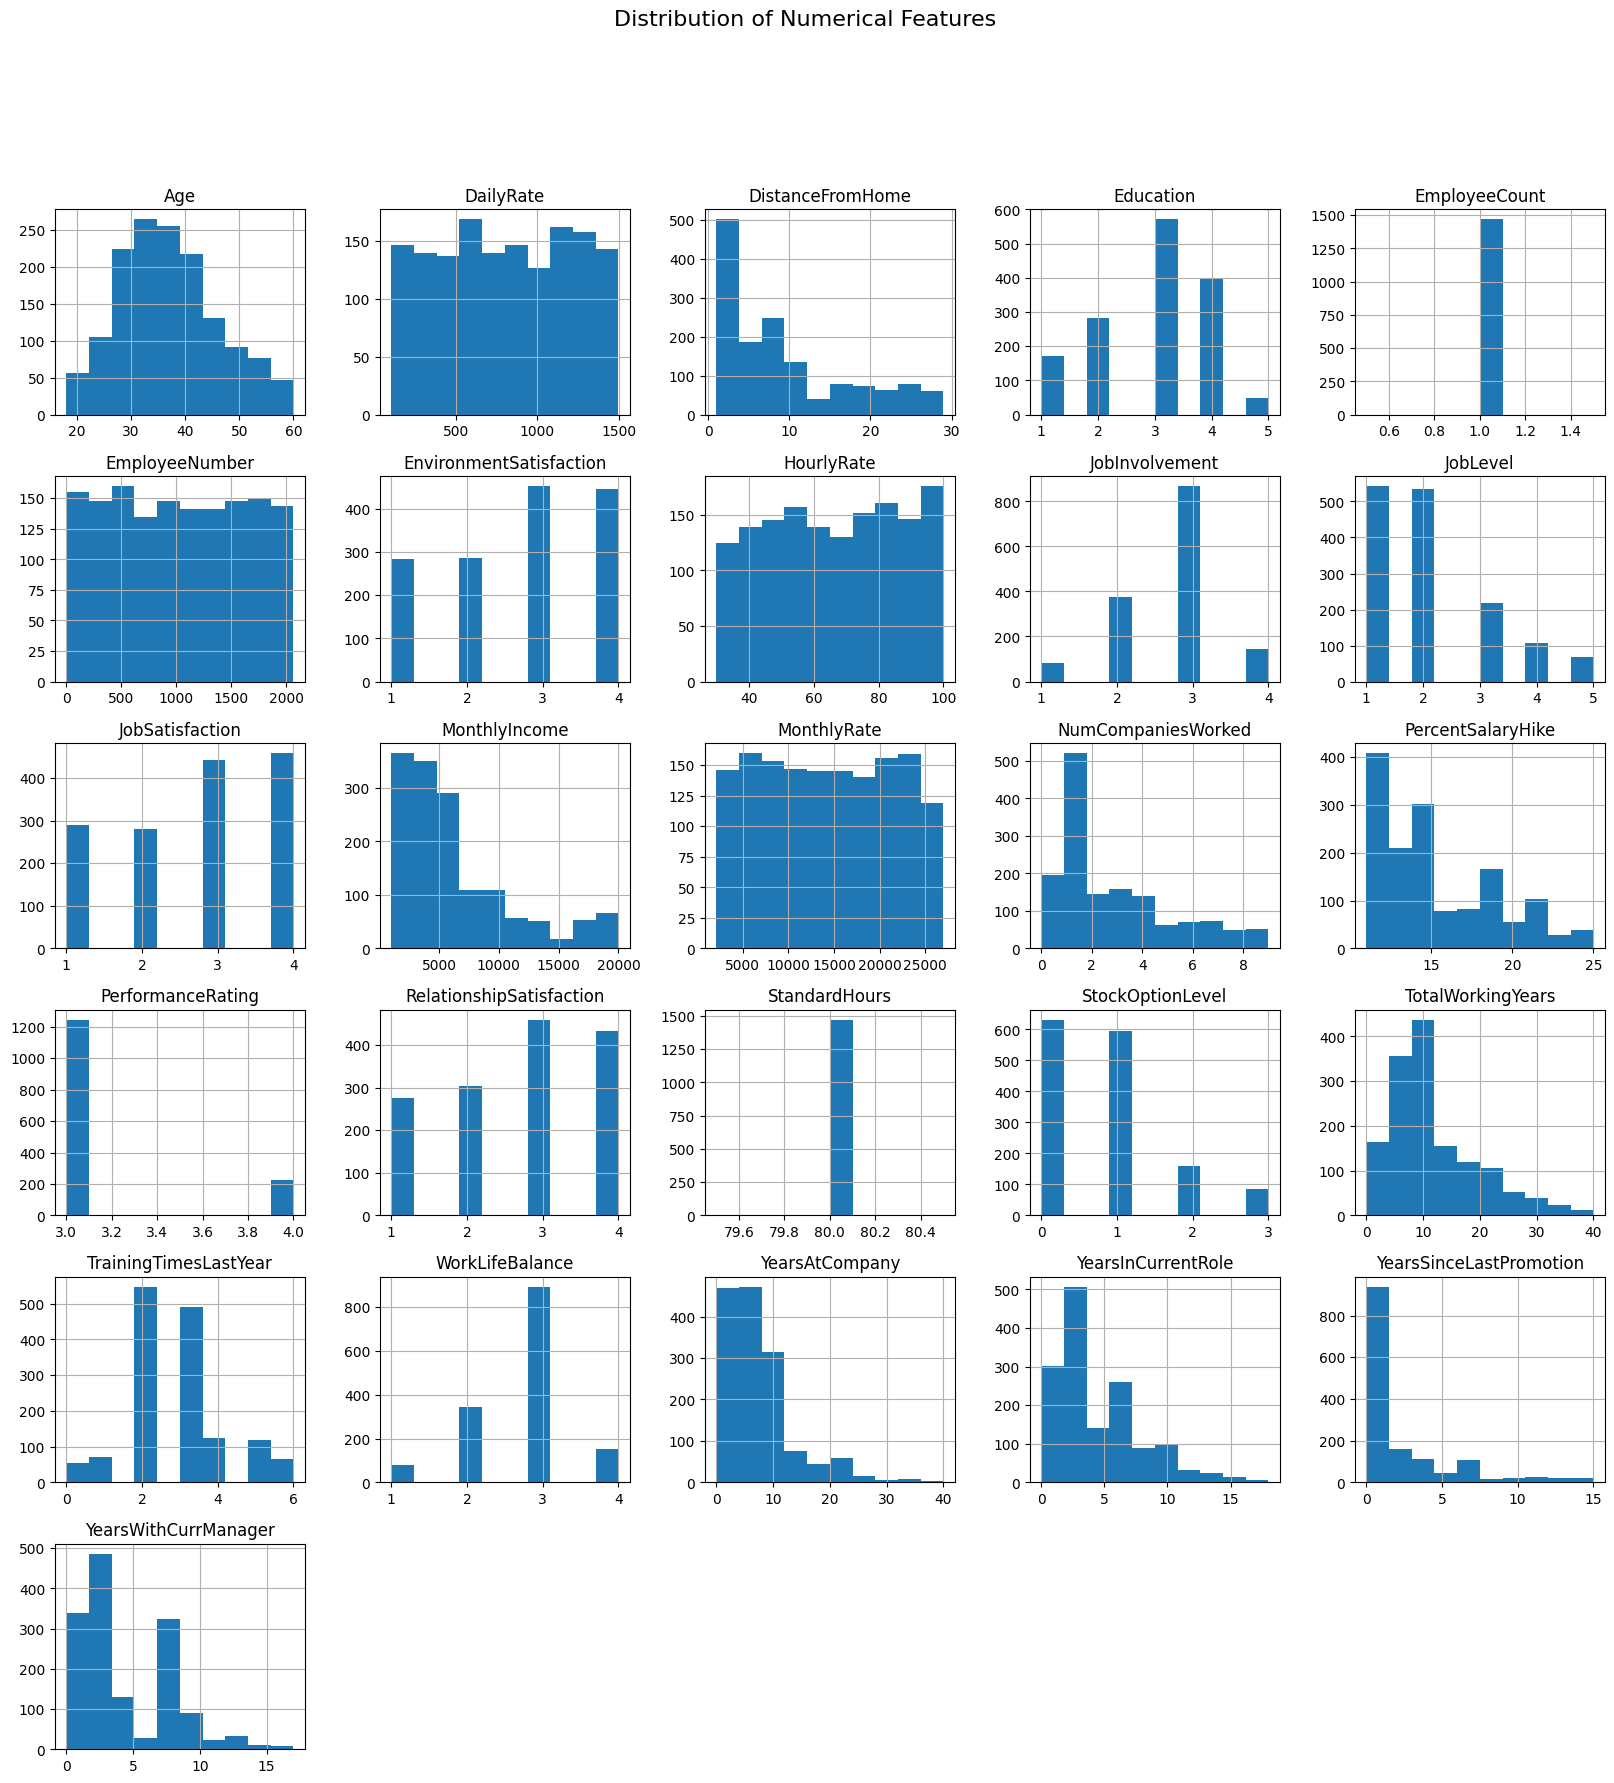

In [87]:
# Visualizing the distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(figsize=(20, 20))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

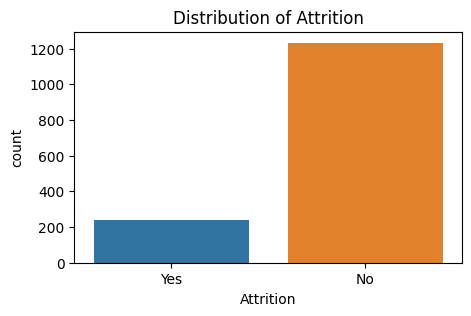

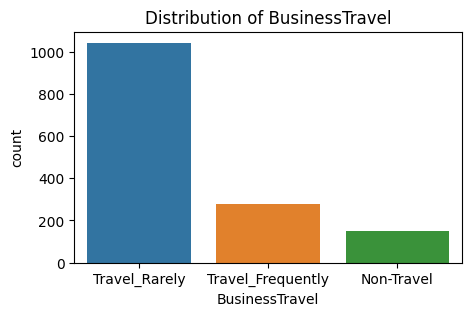

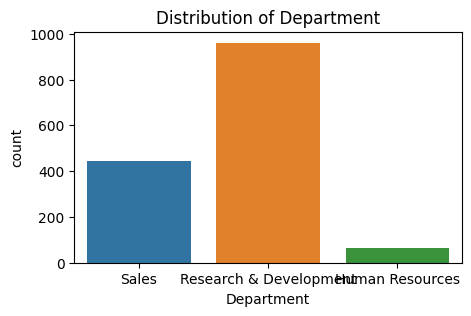

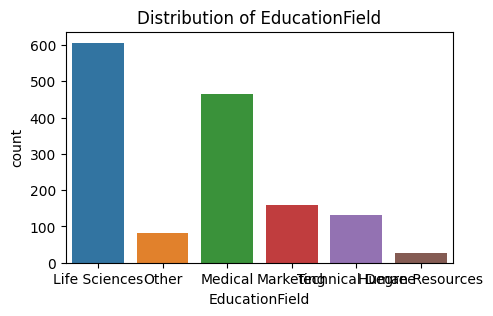

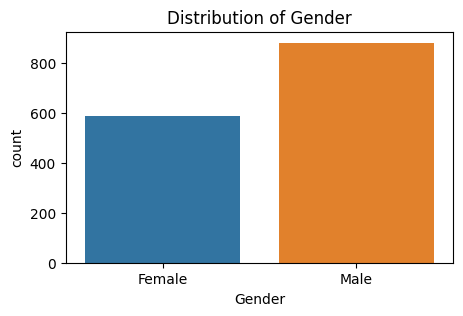

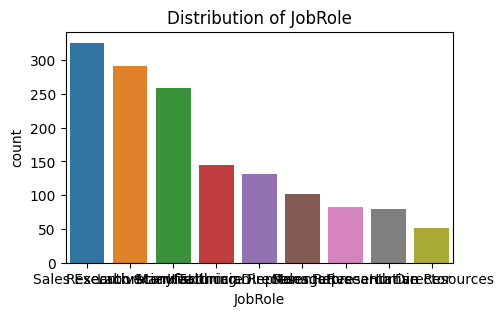

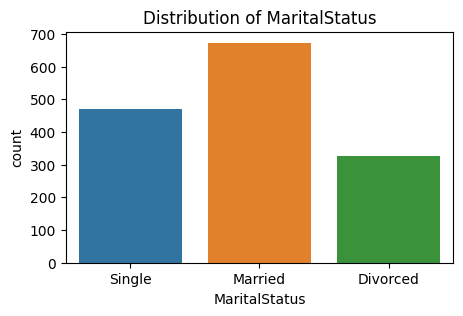

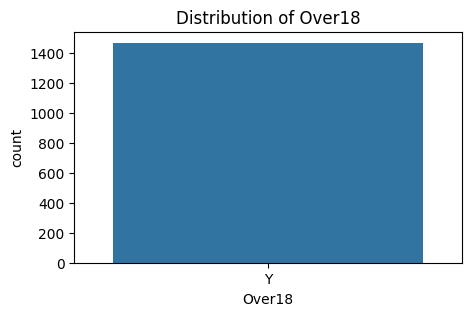

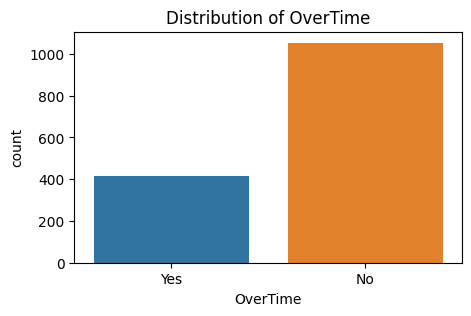

In [88]:
# Visualizing the distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
   plt.figure(figsize=(5, 3))
   sns.countplot(data=df, x=feature)
   plt.title(f'Distribution of {feature}')
   plt.show()

C:\Users\hariharan.s2\AppData\Local\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


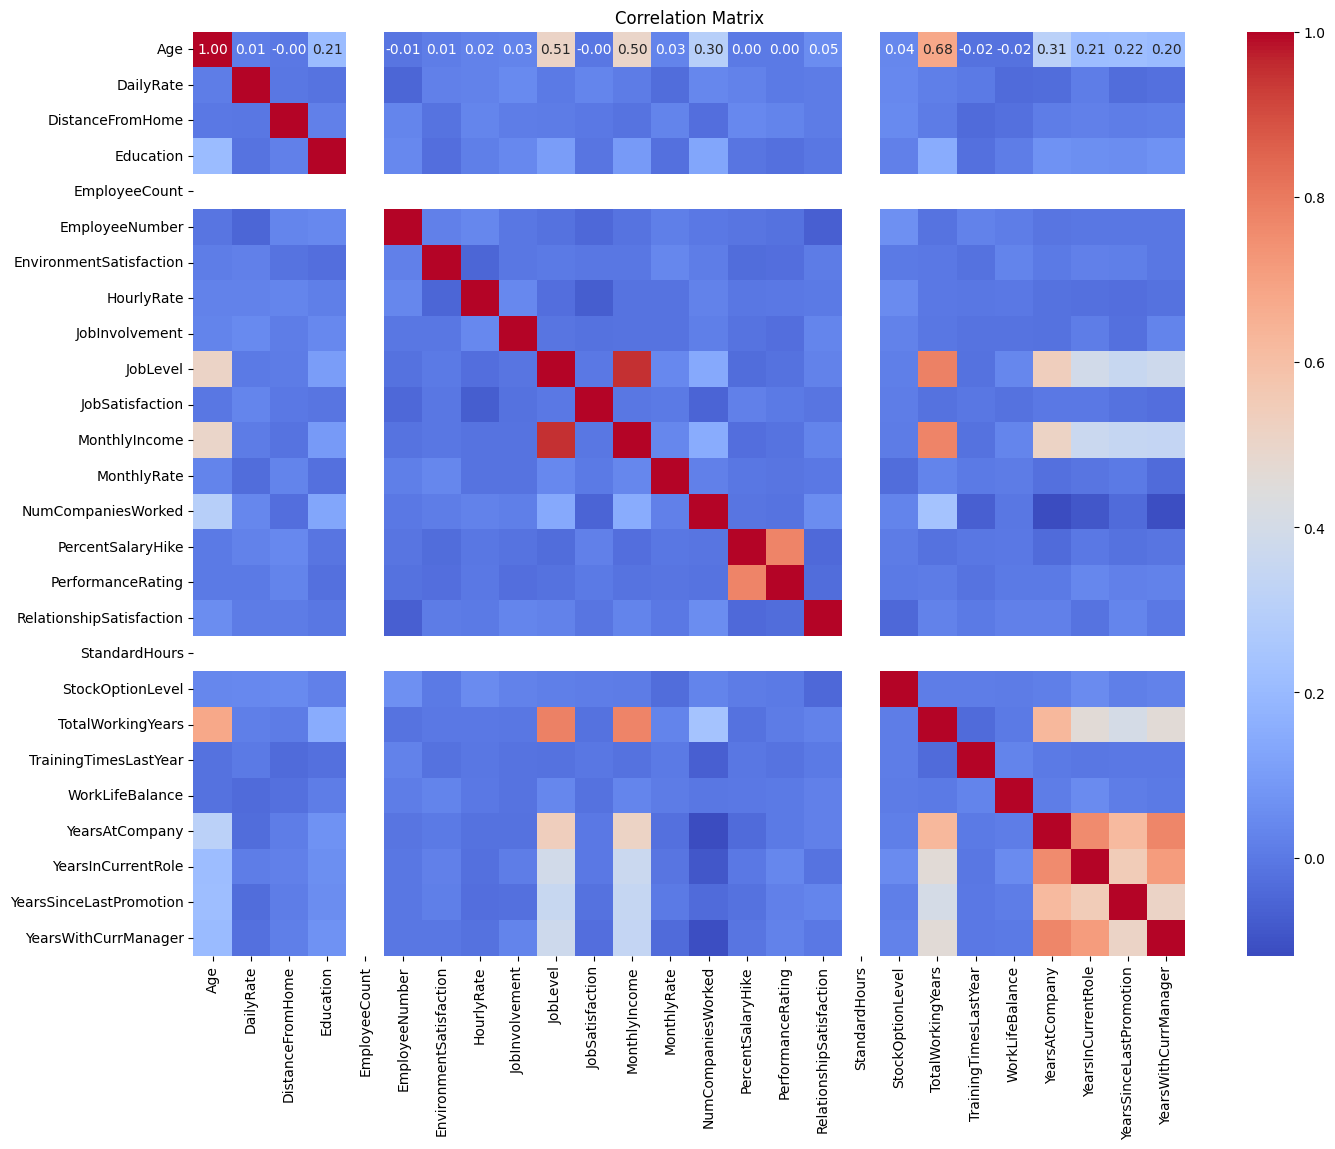

In [89]:
# Correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(numeric_only= True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Machine Learning: Model Building and Fine-Tuning

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [91]:
# Encoding categorical features
label_encoders = {}
for column in categorical_features:
   le = LabelEncoder()
   df[column] = le.fit_transform(df[column])
   label_encoders[column] = le

In [92]:
# Features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [93]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [96]:
# Predictions and Evaluation
y_pred = model.predict(X_test)

In [97]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8571428571428571

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       380
           1       0.40      0.07      0.11        61

    accuracy                           0.86       441
   macro avg       0.63      0.52      0.52       441
weighted avg       0.80      0.86      0.81       441



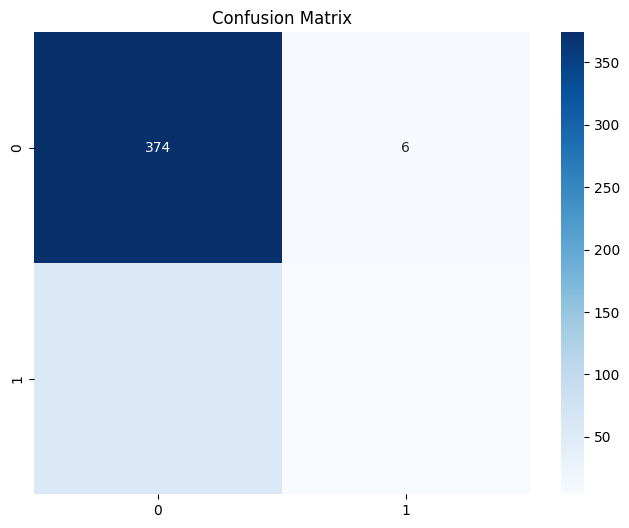

In [98]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Predictive Analysis and Fine-Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
# Hyperparameter tuning using Grid Search
param_grid = {
   'n_estimators': [100, 200, 300],
   'max_depth': [10, 20, 30],
   'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [101]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.8591001657589391


In [102]:
# Predict using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [103]:
print("Accuracy with Best Model:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report with Best Model:")
print(classification_report(y_test, y_pred_best))

Accuracy with Best Model: 0.8616780045351474

Classification Report with Best Model:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       380
           1       0.50      0.08      0.14        61

    accuracy                           0.86       441
   macro avg       0.69      0.53      0.53       441
weighted avg       0.82      0.86      0.82       441



In [104]:
#Recall parameter improved and Prediction precision and recall for Attrition parameter improved

### 1. **Descriptive Analysis and Visualization**

C:\Users\hariharan.s2\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


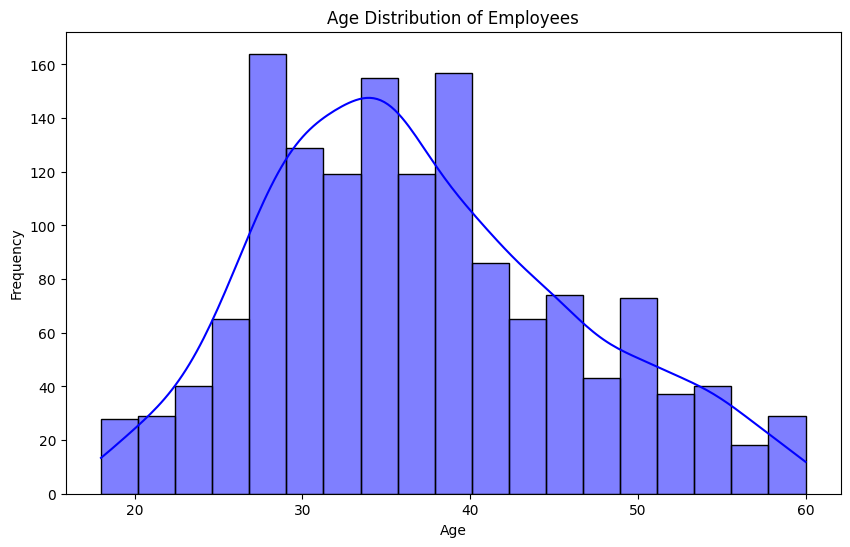

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], kde=True, color='blue')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Insight:**

- The age distribution shows a fairly even spread across different age groups, with peaks around the early 30s and late 40s. This indicates a balanced age demographic within the company. If attrition is high in specific age groups (e.g., younger employees leaving early or older employees retiring), the company could focus on tailored retention strategies for those age groups.

### 2. **Attrition by Gender**

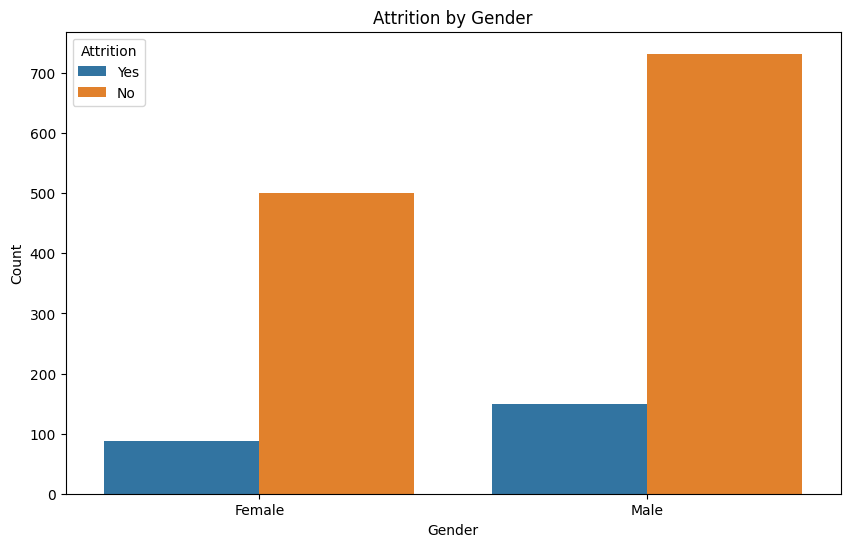

In [106]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Gender', hue='Attrition')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Insight:**

- The visual indicates that attrition is nearly equal between male and female employees, suggesting that gender may not be a significant factor in employee turnover. However, further analysis could be done to explore if specific roles or departments show gender-specific trends in attrition.

### 3. **Attrition by Department**

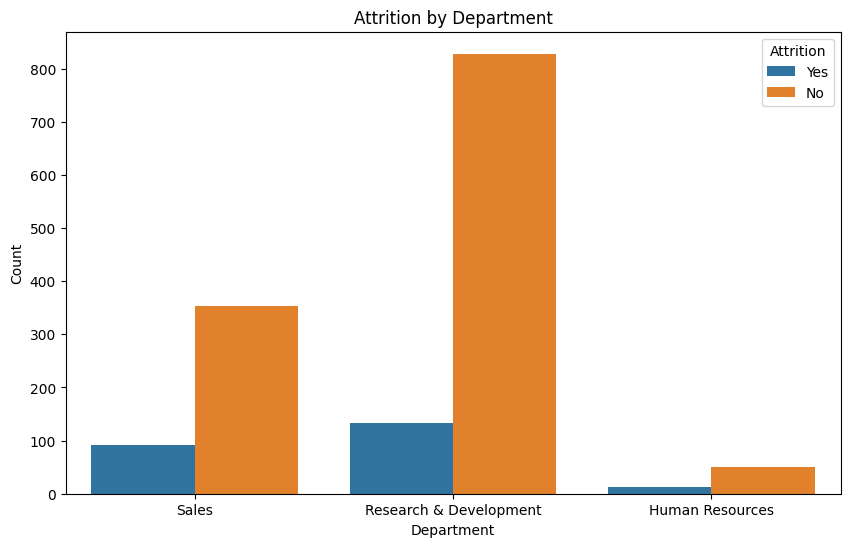

In [107]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

**Insight:**

- This chart reveals that the Research & Development department has a higher absolute number of employees, but Sales has a comparatively higher attrition rate. This suggests that Sales might be experiencing more turnover relative to its size, indicating potential issues in that department, such as job satisfaction, workload, or management practices.

### 4. **Monthly Income Distribution by Attrition**

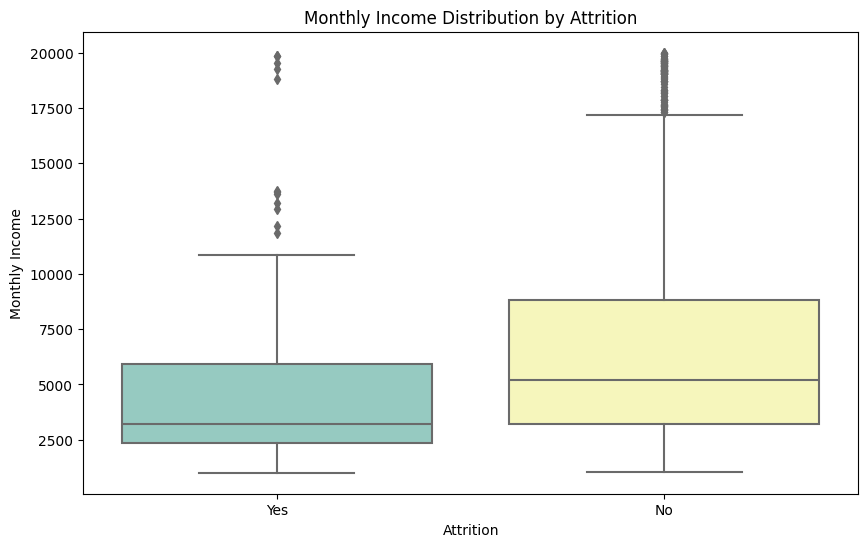

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Attrition', y='MonthlyIncome', palette='Set3')
plt.title('Monthly Income Distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

**Insight:**

- Employees who have lower monthly incomes are more likely to leave, as indicated by the lower quartiles in the attrition group. This suggests that compensation might be a factor driving attrition, and the company might consider reviewing its pay structure, especially for lower-paying roles.

### 5. **Attrition Rate by Job Role**

In [109]:
df['JobRole']= df1['JobRole']

C:\Users\hariharan.s2\AppData\Local\Temp\ipykernel_7228\512883137.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x='JobRole', y='Attrition', estimator=lambda x: sum(x==1)/len(x), palette='Set2',ci= False)


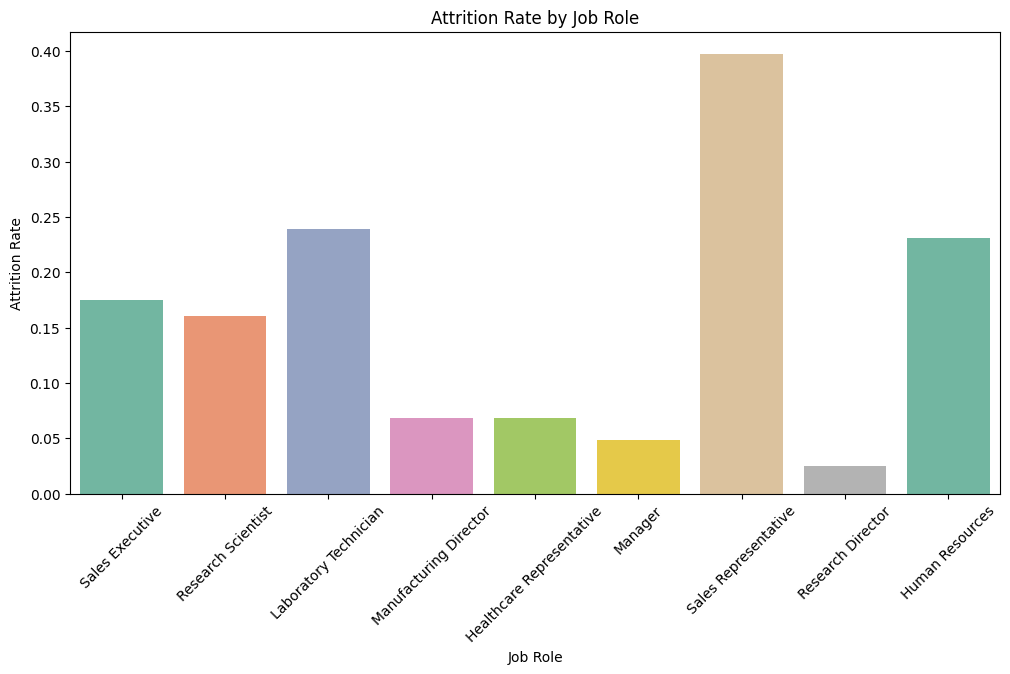

In [113]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='JobRole', y='Attrition', estimator=lambda x: sum(x==1)/len(x), palette='Set2',ci= False)
plt.title('Attrition Rate by Job Role')
plt.xticks(rotation=45)
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate')
plt.show()

**Insight:**

- The job roles with the highest attrition rates are Sales Representatives and Laboratory Technicians. This indicates these roles might be particularly challenging or less satisfying, leading to higher turnover. The company may need to investigate these roles further and implement targeted retention strategies such as career development opportunities or workload adjustments.

### 6. **Work-Life Balance and Attrition**

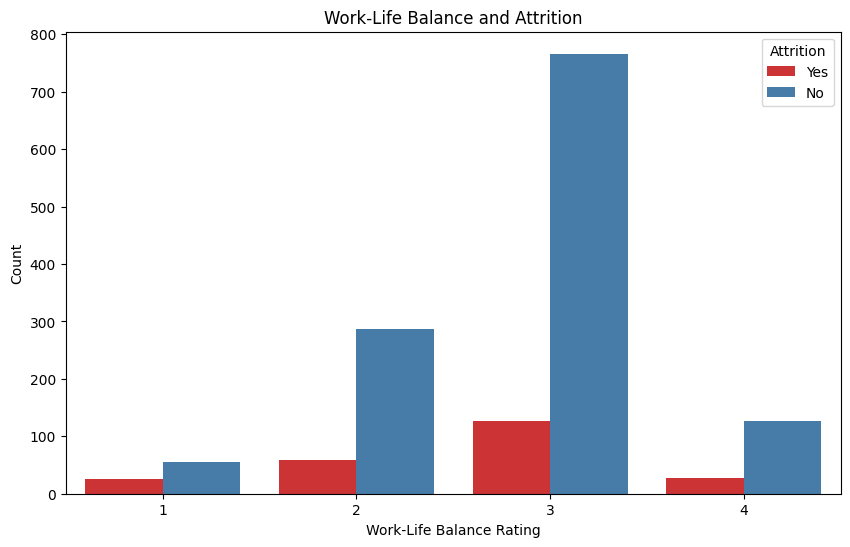

In [115]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='WorkLifeBalance', hue='Attrition', palette='Set1')
plt.title('Work-Life Balance and Attrition')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Count')
plt.show()

**Insight:**

- Employees with lower work-life balance ratings (1 or 2) have higher attrition rates. This suggests that poor work-life balance is a significant contributor to employee turnover. Enhancing policies that support work-life balance, such as flexible work arrangements or wellness programs, could help reduce attrition.

### 7. **Feature Importance for Predicting Attrition**

In [116]:
from sklearn.ensemble import RandomForestClassifier

# Get the feature importances from the trained model
importances = model.feature_importances_
features = X.columns

In [117]:
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

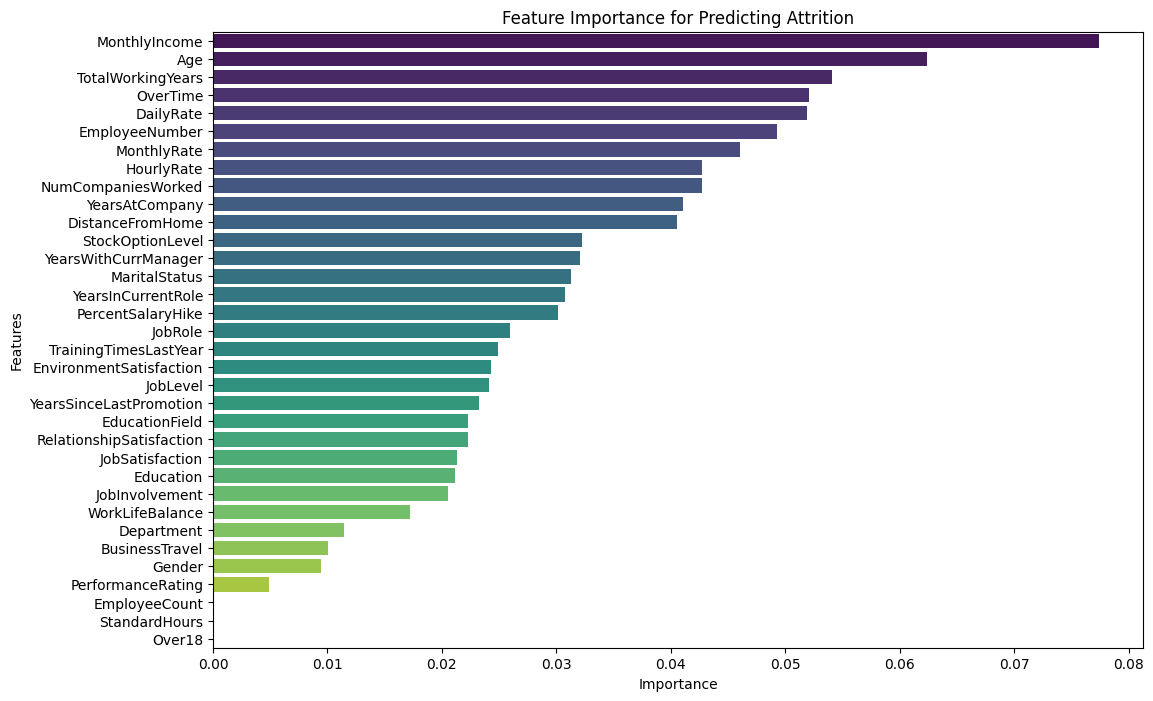

In [118]:
# Feature Importance Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Predicting Attrition')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Insights Based on Feature Importance

1. **MonthlyIncome**:
  - **Importance**: Employees’ income levels also play a key role in attrition. Those with lower income may feel undervalued or may seek better-paying opportunities elsewhere. Reviewing the compensation structure, particularly for lower-paying roles, could reduce turnover.
2. **Age**:
  - **Importance**: Age is a moderately important factor, suggesting that younger or older employees might be more prone to leaving for different reasons, such as career growth or retirement. Tailored retention strategies based on the age group could be beneficial.
3. **TotalWorkingYears**:
  - **Importance**: The total number of years an employee has been working is another significant predictor. Employees with fewer total working years might be less settled in their careers, leading to higher turnover. Providing clear career progression opportunities and mentoring could help retain these employees.
4. **OverTime**:
  - **Importance**: This is the most critical factor in predicting whether an employee will leave. Employees who frequently work overtime are more likely to experience burnout, leading to higher attrition. Reducing mandatory overtime and promoting a healthier work-life balance could significantly improve retention.
5. **YearsAtCompany**:
  - **Importance**: Employees who have been with the company for a shorter period are at a higher risk of leaving. This might be due to a lack of engagement or a poor fit within the company culture. Strengthening onboarding processes and early-career development initiatives could help in retaining these employees.
6. **YearsWithCurrManager**:
  - **Importance**: The length of time an employee has been with their current manager also influences attrition. Strong relationships with managers can enhance job satisfaction and reduce turnover. Encouraging positive manager-employee relationships through training and feedback mechanisms could be effective.
7. **JobRole**:
  - **Importance**: Different job roles have varying levels of attrition risk, likely due to role-specific challenges or satisfaction levels. For instance, roles with high stress or low recognition may see higher attrition. Tailoring support and development opportunities to specific job roles can mitigate this risk.
8. **JobLevel**:
  - **Importance**: Higher job levels may correlate with increased satisfaction or compensation, reducing attrition risk. Conversely, lower job levels might see higher turnover, indicating a need for clearer pathways to advancement.

### Business Implications:
- **OverTime** and **Work-Life Balance** need to be prioritized for intervention as they have the highest impact on attrition. Policies that limit excessive overtime or provide compensation for it could reduce turnover significantly.
- **Job Role** and **Job Level** highlight the importance of role-specific strategies, ensuring that each role is adequately supported with development opportunities.
- **Income and Compensation**: Regular compensation reviews, especially for roles identified as having a high risk of attrition, could ensure that the company remains competitive in the labor market.
- **Career Development**: Employees early in their careers or those with fewer years at the company require structured career development programs to improve retention.

### 8. **Job Satisfaction and Attrition**

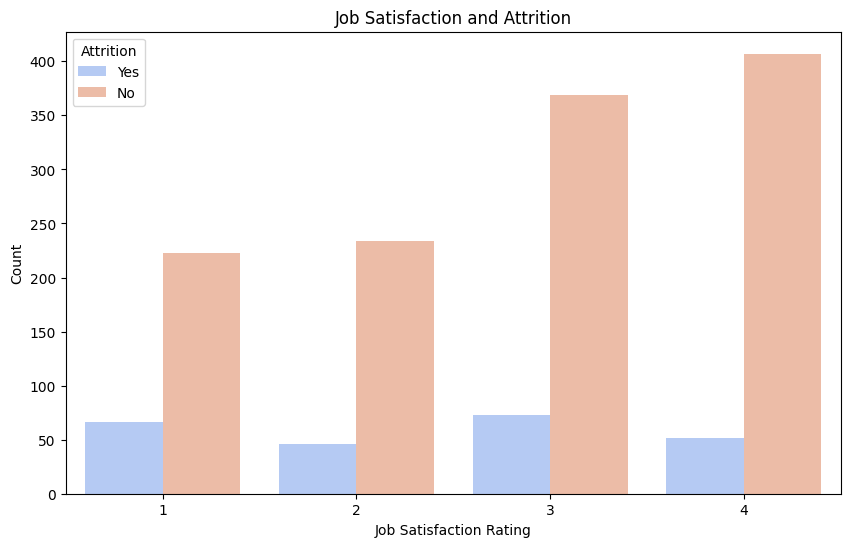

In [120]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='JobSatisfaction', hue='Attrition', palette='coolwarm')
plt.title('Job Satisfaction and Attrition')
plt.xlabel('Job Satisfaction Rating')
plt.ylabel('Count')
plt.show()

**Insight:**
- Employees with lower job satisfaction ratings (1 or 2) show higher attrition rates. This strongly suggests that improving job satisfaction through better job design, recognition, and employee engagement could significantly reduce turnover.

### 9. **Years at Company vs. Attrition**

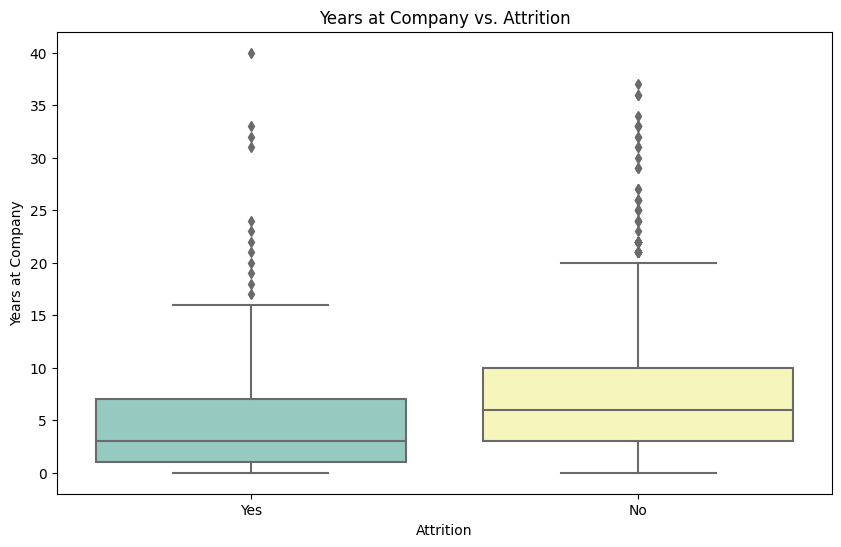

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Attrition', y='YearsAtCompany', palette='Set3')
plt.title('Years at Company vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()

**Insight:**
- Employees who leave tend to have fewer years at the company, particularly in their first few years. This suggests that the initial years are critical for employee retention. Implementing mentorship programs or structured onboarding processes could help retain employees in this vulnerable period.